In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

In [3]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 30}
plt.rc('font', **font)

sns.set(font_scale=2)

In [4]:
# Import Data
control = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\control_morph.csv")
dox = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\dox_morph.csv")

control.head()
dox.head()

,Culture,CD44,p16,p21,p38,SABG,Standardized_Circ,Standardized_AR,Standardized_Round,Standardized_Cell_area,Standardized_Nucleus_Area,Standardized_Nucleus_Circ,Standardized_Nucleus_AR,Standardized_Nucleus_Round
0,Dox,13.093,50.223,2.075,33.570,22.317,-0.595746,0.112347,-0.612177,0.736409,0.334768,1.251463,-1.014267,1.133245
1,Dox,14.819,52.013,6.323,35.040,21.258,0.400357,-0.416815,-0.079758,0.326488,-0.413418,0.303308,0.675097,-0.798423
2,Dox,12.502,48.133,4.422,33.427,21.495,-0.461656,-0.534468,0.114418,1.148478,-0.614851,1.404392,-0.949416,1.027882
3,Dox,16.721,53.619,5.075,37.328,22.350,0.764318,-0.720018,0.552880,-0.814053,-0.985338,0.226844,-0.119326,-0.025756
4,Dox,17.285,49.929,5.392,37.920,23.257,1.271947,-0.952025,1.511234,1.752206,-0.183213,0.165672,-0.200389,0.056194


In [5]:
# Concatenate Data
culture_data = pd.concat([control, dox], ignore_index=True)
culture_data.head()

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(data)

,Culture,CD44,p16,p21,p38,SABG,Standardized_Circ,Standardized_AR,Standardized_Round,Standardized_Cell_area,Standardized_Nucleus_Area,Standardized_Nucleus_Circ,Standardized_Nucleus_AR,Standardized_Nucleus_Round
0,Control,10.919,38.994,2.197,13.048,20.583,-0.932094,0.985071,-0.975041,1.226817,3.910913,0.591346,-0.125395,-0.038897
1,Control,18.228,34.153,2.145,13.089,20.689,0.080754,0.985851,-0.975041,-1.110329,0.051909,0.176097,0.958078,-0.932323
2,Control,12.657,33.693,2.625,12.566,20.932,2.202260,-0.764773,0.608675,0.241803,0.588315,0.337583,-1.599069,1.884703
3,Control,12.893,34.330,2.079,14.721,20.982,0.135503,-0.942056,1.075871,-0.292439,-0.161602,0.475999,-1.322518,1.428874
4,Control,12.688,38.876,2.182,12.936,20.844,0.833546,-0.915950,0.996685,1.084623,-0.021002,-0.308361,-0.519385,0.371349


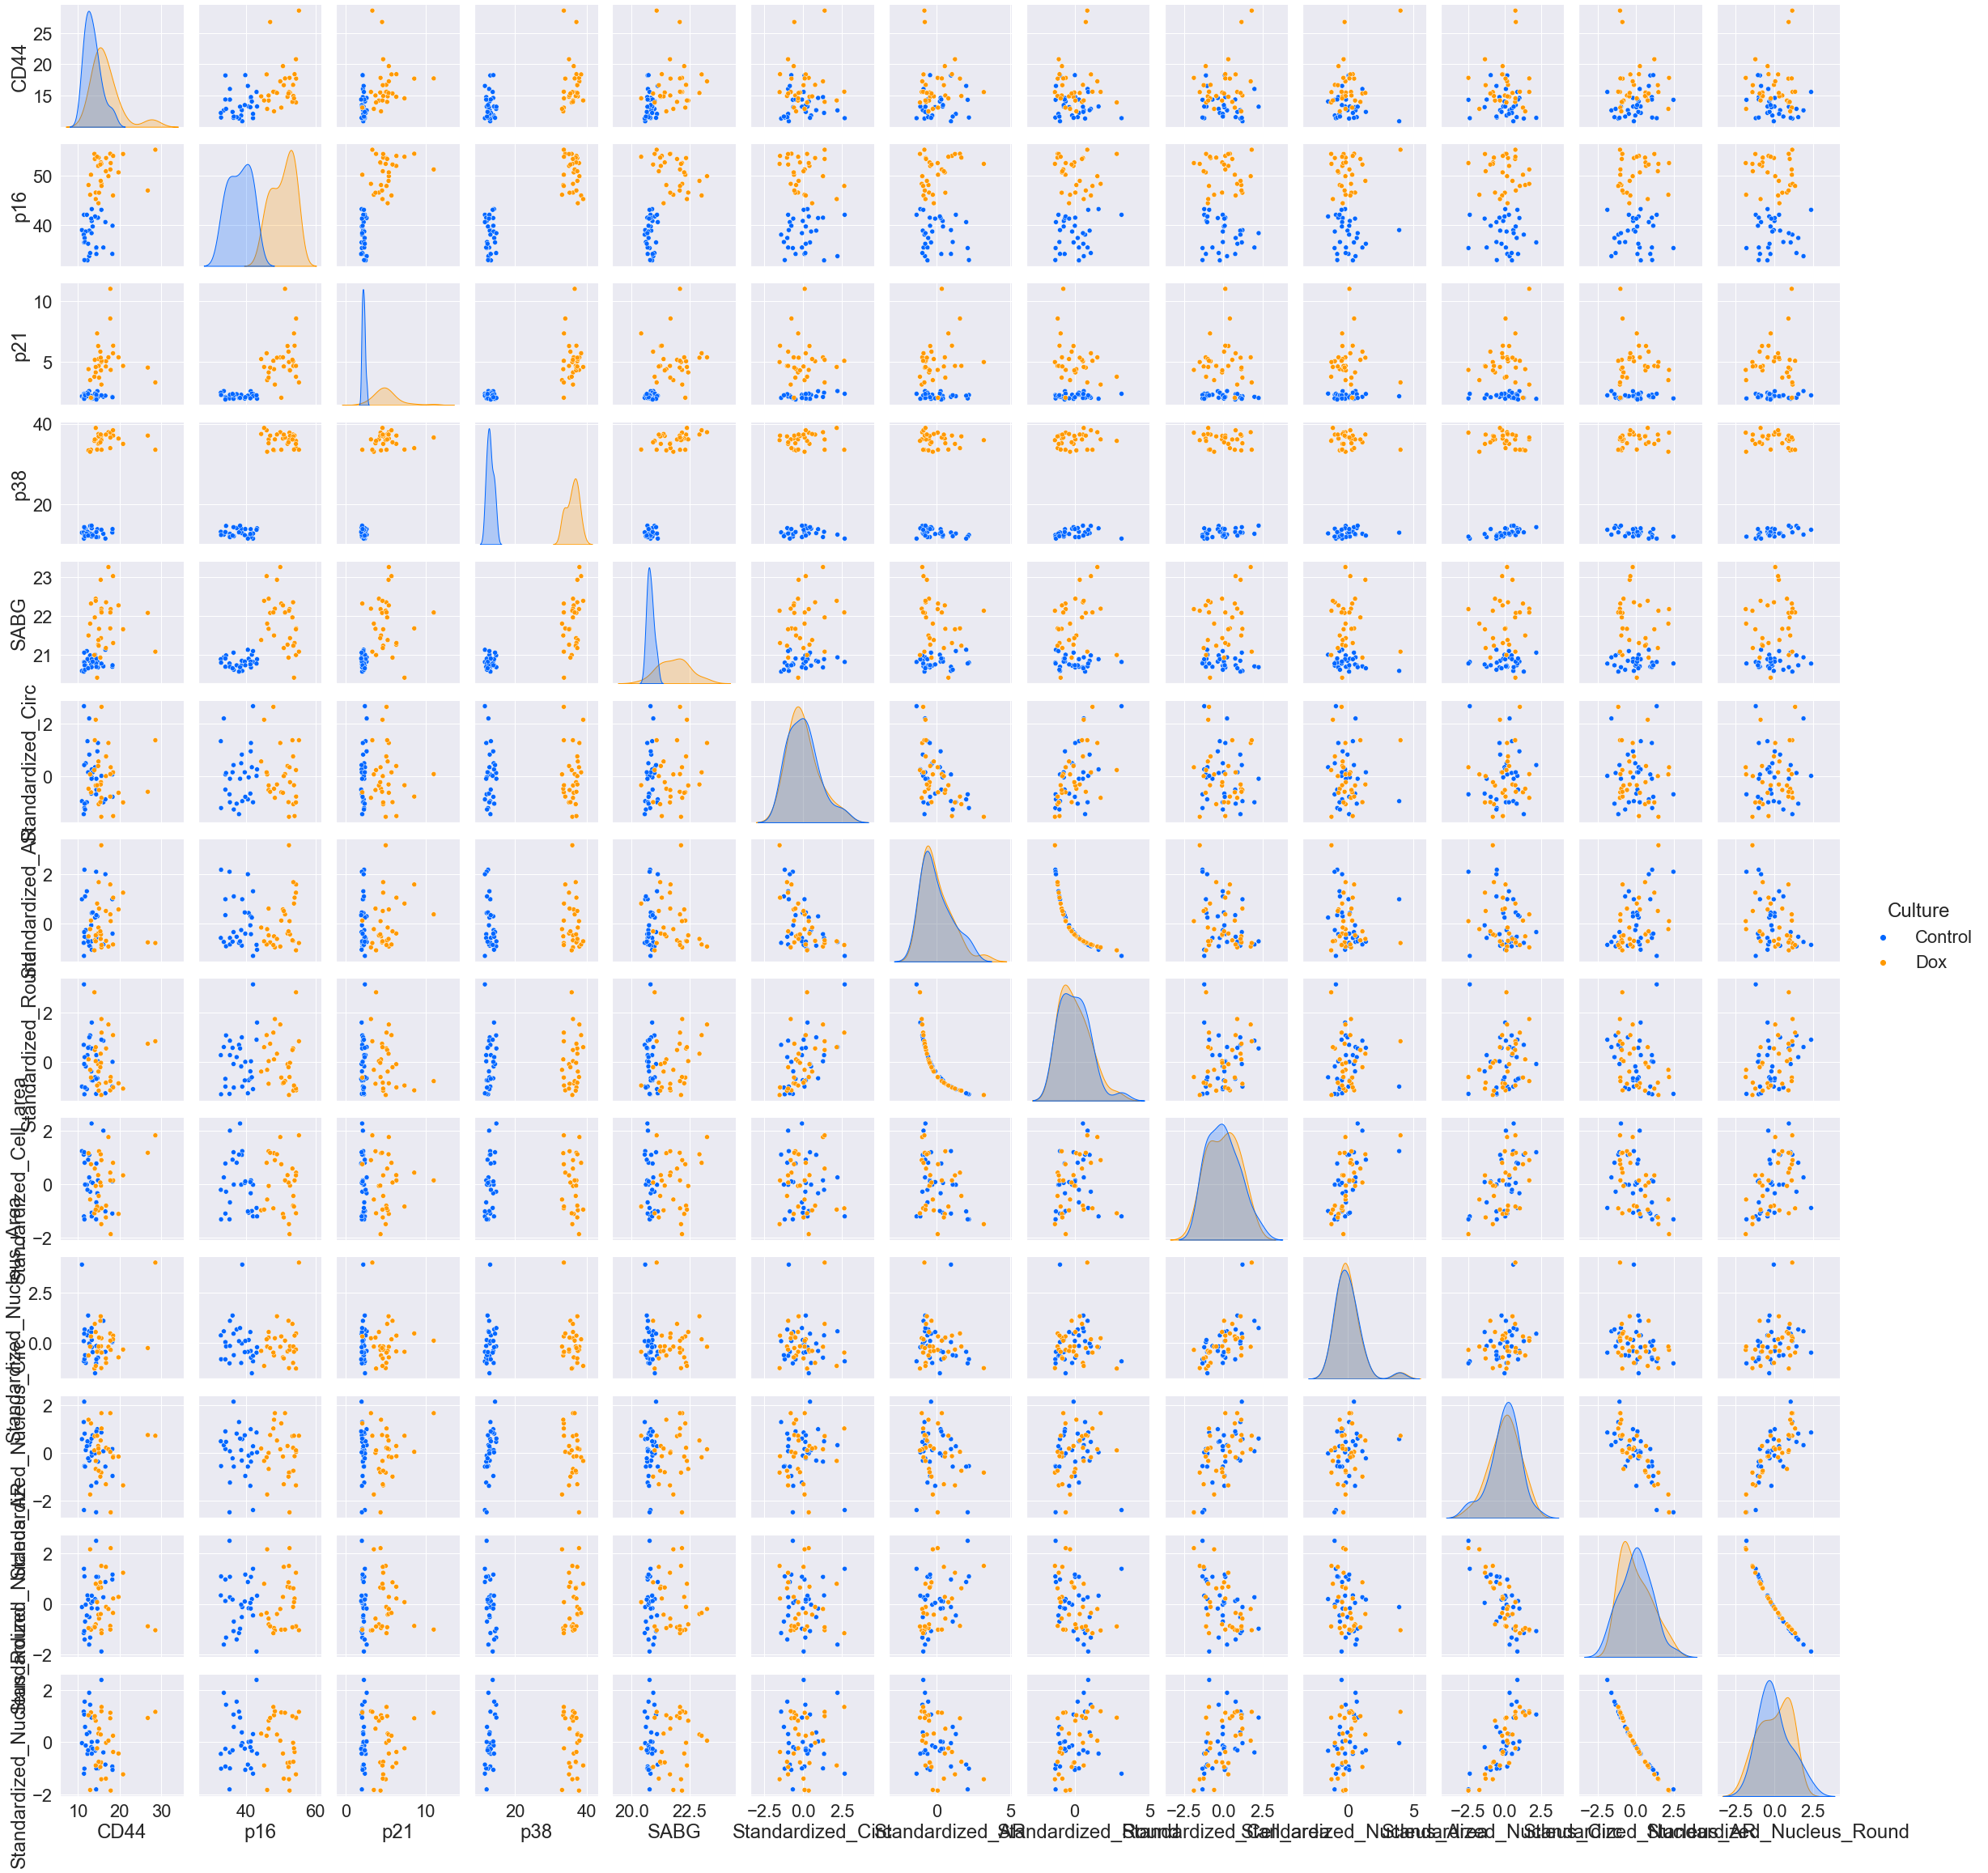

In [6]:
palette = {"Control":"#0066ff", 
           "Dox":"#ff9900"}

sns.pairplot(culture_data, hue='Culture', palette=palette)

In [7]:
import umap

In [8]:
reducer = umap.UMAP()

In [9]:
marker_data = culture_data[["CD44", "p16", "p21", "p38", "SABG", "Standardized_Circ", "Standardized_AR", "Standardized_Round", "Standardized_Cell_area", "Standardized_Nucleus_Area", "Standardized_Nucleus_Circ", "Standardized_Nucleus_AR", "Standardized_Nucleus_Round"]].values
embedding = reducer.fit_transform(marker_data)
embedding.shape

(60, 2)

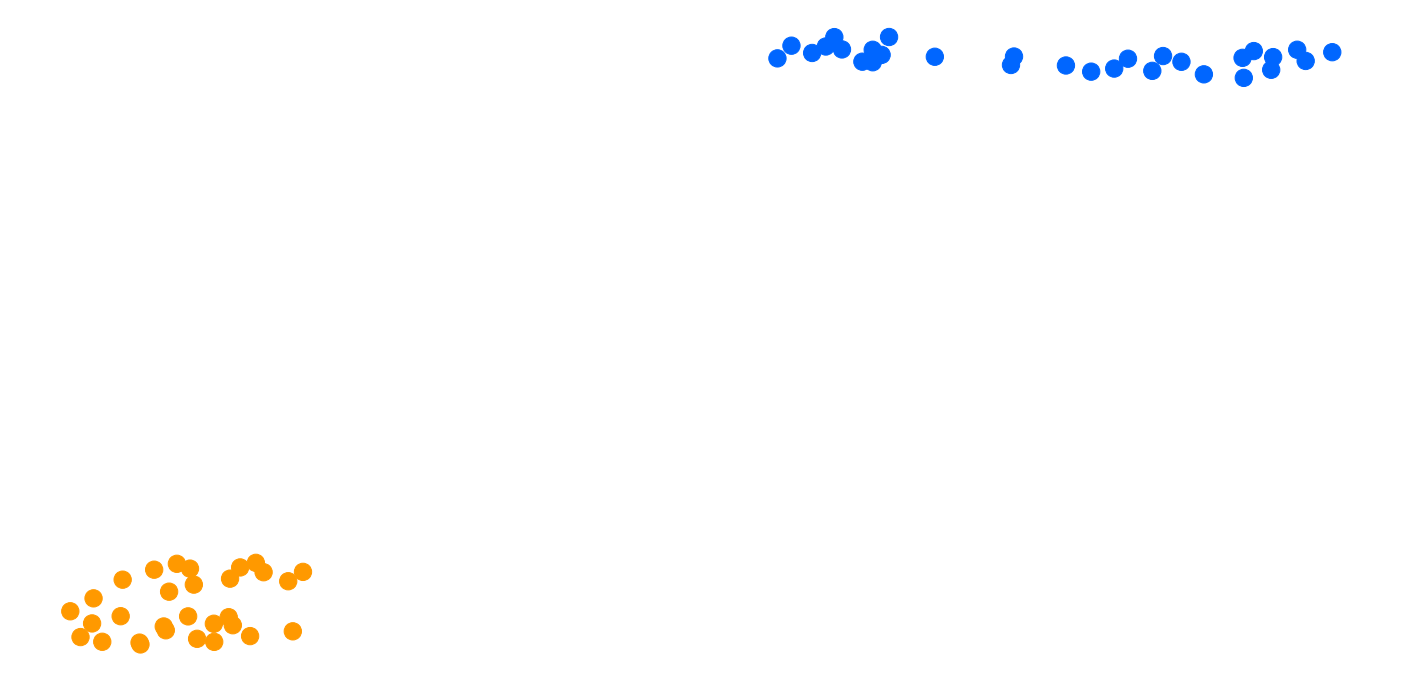

In [10]:
fig, ax = plt.subplots(figsize = [20,10])
ax.set_facecolor('white')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines["top"].set_linewidth(5)
ax.spines["left"].set_linewidth(5)
ax.spines["right"].set_linewidth(5)
ax.spines["bottom"].set_linewidth(5)

plt.scatter(embedding[:, 0], embedding[:, 1], c=[palette[x] for x in culture_data.Culture], s=300)

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
# plt.gca().set_aspect('equal', 'datalim')

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.tight_layout()
plt.savefig(fname="dox_umap")

In [11]:
marker_LDA = LDA(n_components=2).fit_transform(marker_data,culture_data.Culture)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

In [ ]:
plt.scatter(marker_LDA[:,0], marker_LDA[:, 1], c=[palette[x] for x in culture_data.Culture])

plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.gca().set_aspect('equal', 'datalim')

In [ ]:
marker_PCA = PCA().fit(marker_data)

In [ ]:
target = culture_data.Culture.to_numpy()

loadings = marker_PCA.components_
marker_PCA.explained_variance_

pca_scores = PCA().fit_transform(marker_data)

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=culture_data.Culture, var1=round(marker_PCA.explained_variance_ratio_[0]*100, 2), var2=round(marker_PCA.explained_variance_ratio_[1]*100, 2))